# 15 – Statistical Plots in Seaborn
**Author:** Hamna Munir  
**Repository:** Python-Libraries-for-AI-ML  
**Topic:* Confidence Intervals, Bootstrapping, Error Bars, Statistical Interpretation

---
##  Goal
Learn how Seaborn performs statistical estimation & visualization:
- Confidence Intervals (CIs)
- Bootstrapping
- Error bars (std, sem, percentile intervals)
- Statistical reasoning for each plot


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

---
## 1. Confidence Intervals (CI) in Seaborn
Seaborn computes **bootstrap confidence intervals** by default in estimating plots such as `lineplot`, `barplot`, `pointplot`.

### Default CI = 95%
You can change CI using `errorbar=('ci', level)`.


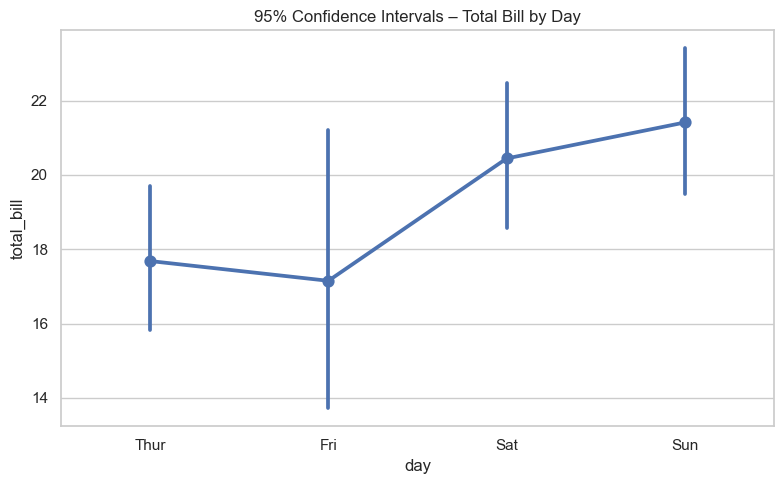

In [2]:
plt.figure(figsize=(8,5))
sns.pointplot(data=tips, x="day", y="total_bill", errorbar=('ci', 95))
plt.title('95% Confidence Intervals – Total Bill by Day')
plt.tight_layout()

---
## 2. Bootstrapping
Seaborn uses **bootstrap sampling** to estimate variability.
We can adjust number of bootstrap samples with `n_boot`.


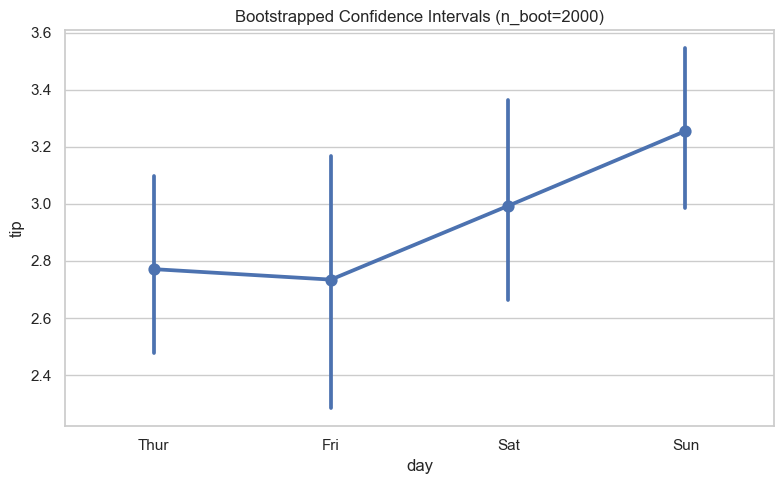

In [3]:
plt.figure(figsize=(8,5))
sns.pointplot(data=tips, x="day", y="tip", errorbar=('ci', 95), n_boot=2000)
plt.title('Bootstrapped Confidence Intervals (n_boot=2000)')
plt.tight_layout()

---
## 3. Error Bars
Seaborn supports:
- Standard deviation: `('sd')`
- Standard error of mean: `('se')`
- Percentiles: `('pi', (5,95))`


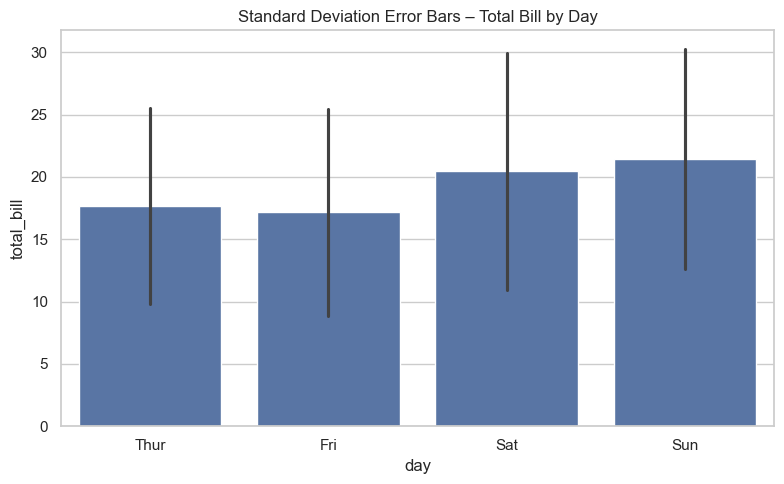

In [4]:
# Standard deviation error bars
plt.figure(figsize=(8,5))
sns.barplot(data=tips, x="day", y="total_bill", errorbar='sd')
plt.title('Standard Deviation Error Bars – Total Bill by Day')
plt.tight_layout()

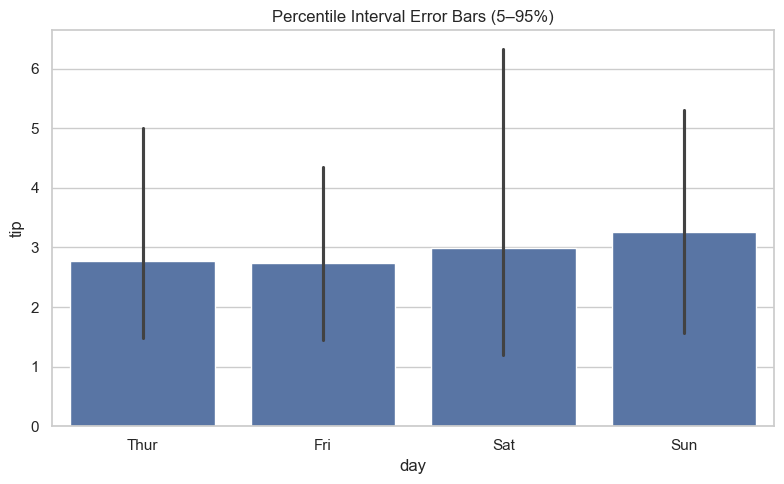

In [10]:
# Percentile interval (5th–95th)
plt.figure(figsize=(8,5))
sns.barplot(data=tips, x="day", y="tip", errorbar=("pi", 90))
plt.title('Percentile Interval Error Bars (5–95%)')
plt.tight_layout()
plt.show()

---
## 4. Comparing CIs and Standard Deviation
CI captures **uncertainty of the mean**, while SD shows **spread of raw data**.

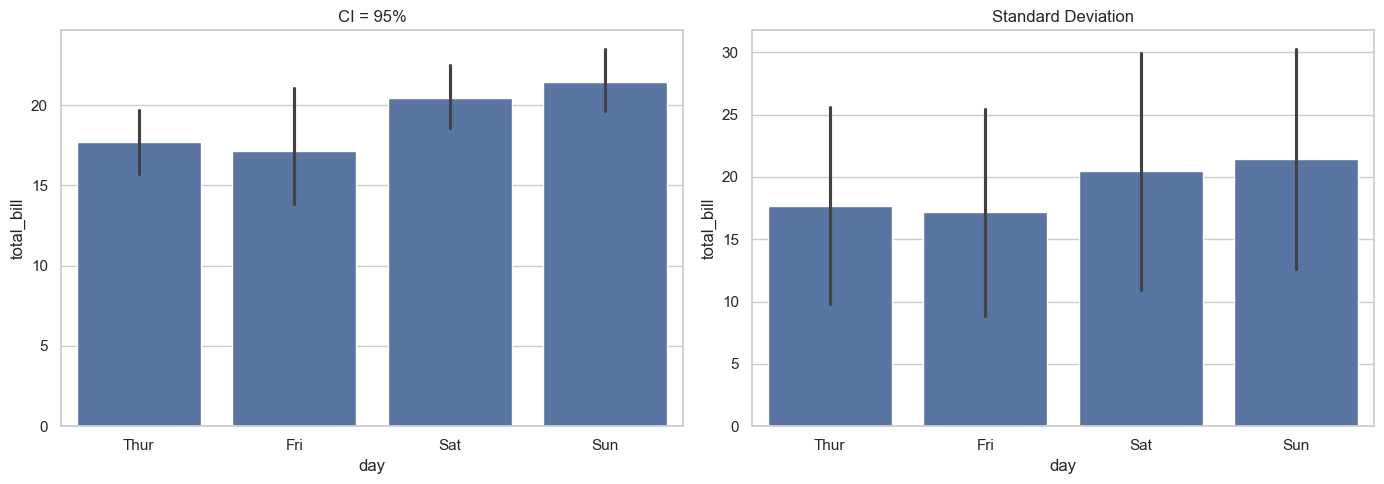

In [11]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

sns.barplot(data=tips, x="day", y="total_bill", errorbar=('ci', 95), ax=axes[0])
axes[0].set_title('CI = 95%')

sns.barplot(data=tips, x="day", y="total_bill", errorbar='sd', ax=axes[1])
axes[1].set_title('Standard Deviation')

plt.tight_layout()

---
## 5. Statistical Interpretation Example
### Q: *Is the average tip higher on weekends?*
Using CI overlap: if the error bars for categories do **not overlap**, the difference may be significant.


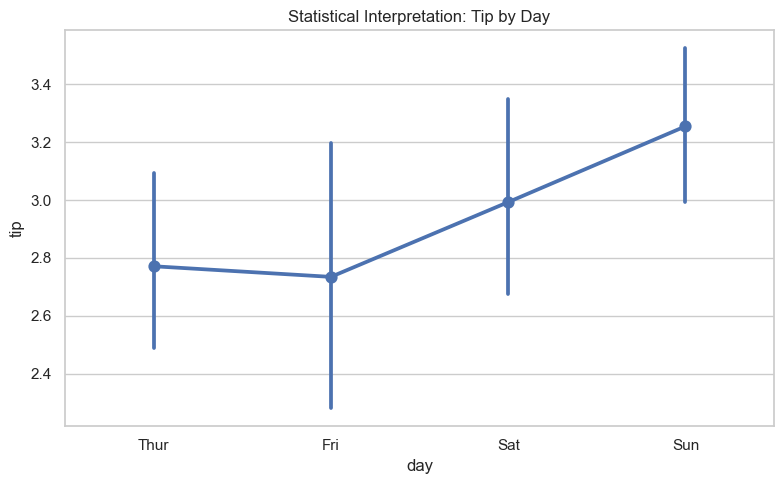

In [12]:
plt.figure(figsize=(8,5))
sns.pointplot(data=tips, x="day", y="tip", errorbar=('ci', 95))
plt.title('Statistical Interpretation: Tip by Day')
plt.tight_layout()

---
## 6. Bootstrapped Distribution Visualized
Manual bootstrap demonstration for teaching purpose.

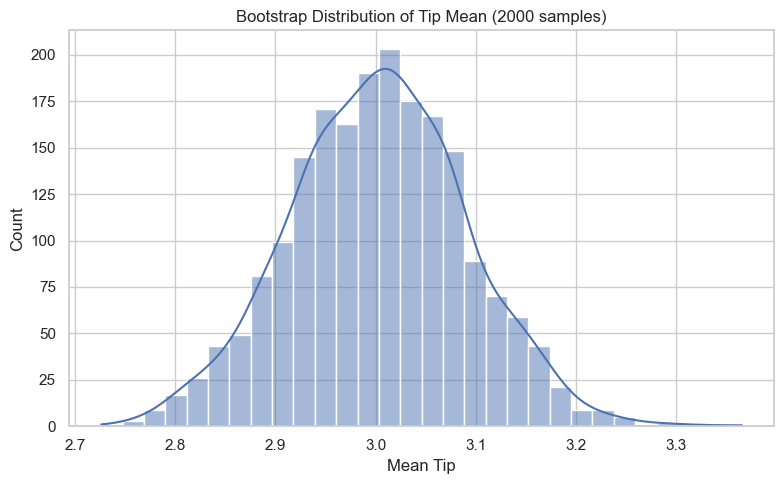

In [13]:
boot_means = []
for i in range(2000):
    sample = tips['tip'].sample(frac=1, replace=True)
    boot_means.append(sample.mean())

plt.figure(figsize=(8,5))
sns.histplot(boot_means, bins=30, kde=True)
plt.title('Bootstrap Distribution of Tip Mean (2000 samples)')
plt.xlabel('Mean Tip')
plt.tight_layout()